<a href="https://colab.research.google.com/github/JefersonBLuz/ProjetoK-means/blob/main/ProjetoTIC36_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificação
---

##Projeto
Implementação e Análise do Algoritmo de K-means referente as atividades Conjunto de dados Reconhecimento de atividade humana

## Grupo 24
* Jeferson Braga
* Rafael Rodrigues Souza

# Análise de Agrupamento com K-means


Este notebook implementa o algoritmo K-means usando o dataset **Human Activity Recognition Using Smartphones**.
Inclui desde a análise exploratória até a escolha do número ideal de clusters e a visualização dos resultados.

**Objetivos:**

1. [Definir e preparar o problema com análise exploratória.](#scrollTo=8205e5b4)
2. [Implementar o algoritmo K-means.](#scrollTo=d3e277ff)
3. [Otimizar e ajustar o modelo.](#scrollTo=8494c766)
4. [Analisar e visualizar os resultados.](#scrollTo=80beb80a)


## 1. Definição e Preparação do Problema

#### Importação de Bibliotecas

In [2]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#### Dataset

In [3]:
# 1 Upload
!gdown '1Q_2S28BQRsGAm105ORcqXDGR0spydsCq' --output 'UCI HAR Dataset.zip'

# 2 Extrair
!unzip 'UCI HAR Dataset.zip'

Downloading...
From (original): https://drive.google.com/uc?id=1Q_2S28BQRsGAm105ORcqXDGR0spydsCq
From (redirected): https://drive.google.com/uc?id=1Q_2S28BQRsGAm105ORcqXDGR0spydsCq&confirm=t&uuid=8bed90e8-04a7-4942-8aec-4cc3060db9dc
To: /content/UCI HAR Dataset.zip
100% 61.0M/61.0M [00:01<00:00, 31.4MB/s]
Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Datase

In [4]:
# Ler os dados de treino (X_train) e suas respectivas labels (y_train)
X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)

# Carregar os nomes das features
feature_names = pd.read_csv("UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)[1]
X_train.columns = feature_names

# Análise Exploratória
print(f"Dimensões dos dados: {X_train.shape}")
print(f"Primeiras linhas do dataset:\n{X_train.head()}")
print(f"Distribuição das classes:\n{y_train.value_counts()}")

<ipython-input-4-7e64bb629858>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)


Dimensões dos dados: (7352, 561)
Primeiras linhas do dataset:
1  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

1  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.97967

<ipython-input-4-7e64bb629858>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-4-7e64bb629858>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  feature_names = pd.read_csv("UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)[1]


## 2. Redução de Dimensionalidade com PCA

### Aplicação PCA



1. Normalização dos dados.
2. Aplicação do PCA para reduzir para 2 componentes principais.

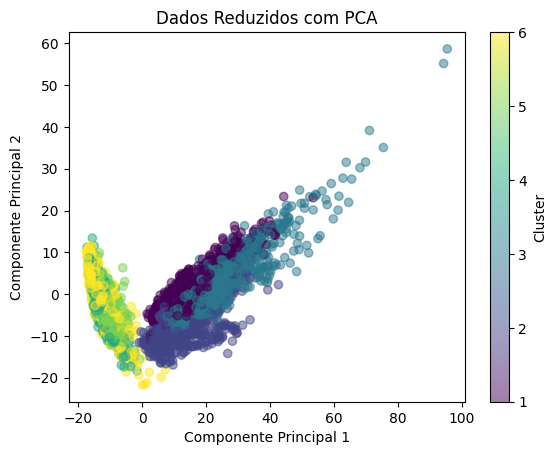

In [15]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Aplicação do PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train[0], cmap='viridis', alpha=0.5)
plt.title("Dados Reduzidos com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.show()


### Gráfico de distribuição das 6 primeiras variáveis



1. tBodyAcc-mean()-X
2. tBodyAcc-mean()-Y
3. tBodyAcc-mean()-Z
4. tBodyAcc-std()-X
5. tBodyAcc-std()-Y
6. tBodyAcc-std()-Z

<h1>Legenda</h1>

* t = tempo
* BodyAcc = Aceleração corporal
* mean() => Valor Médio
* std() => Desvio de padrão

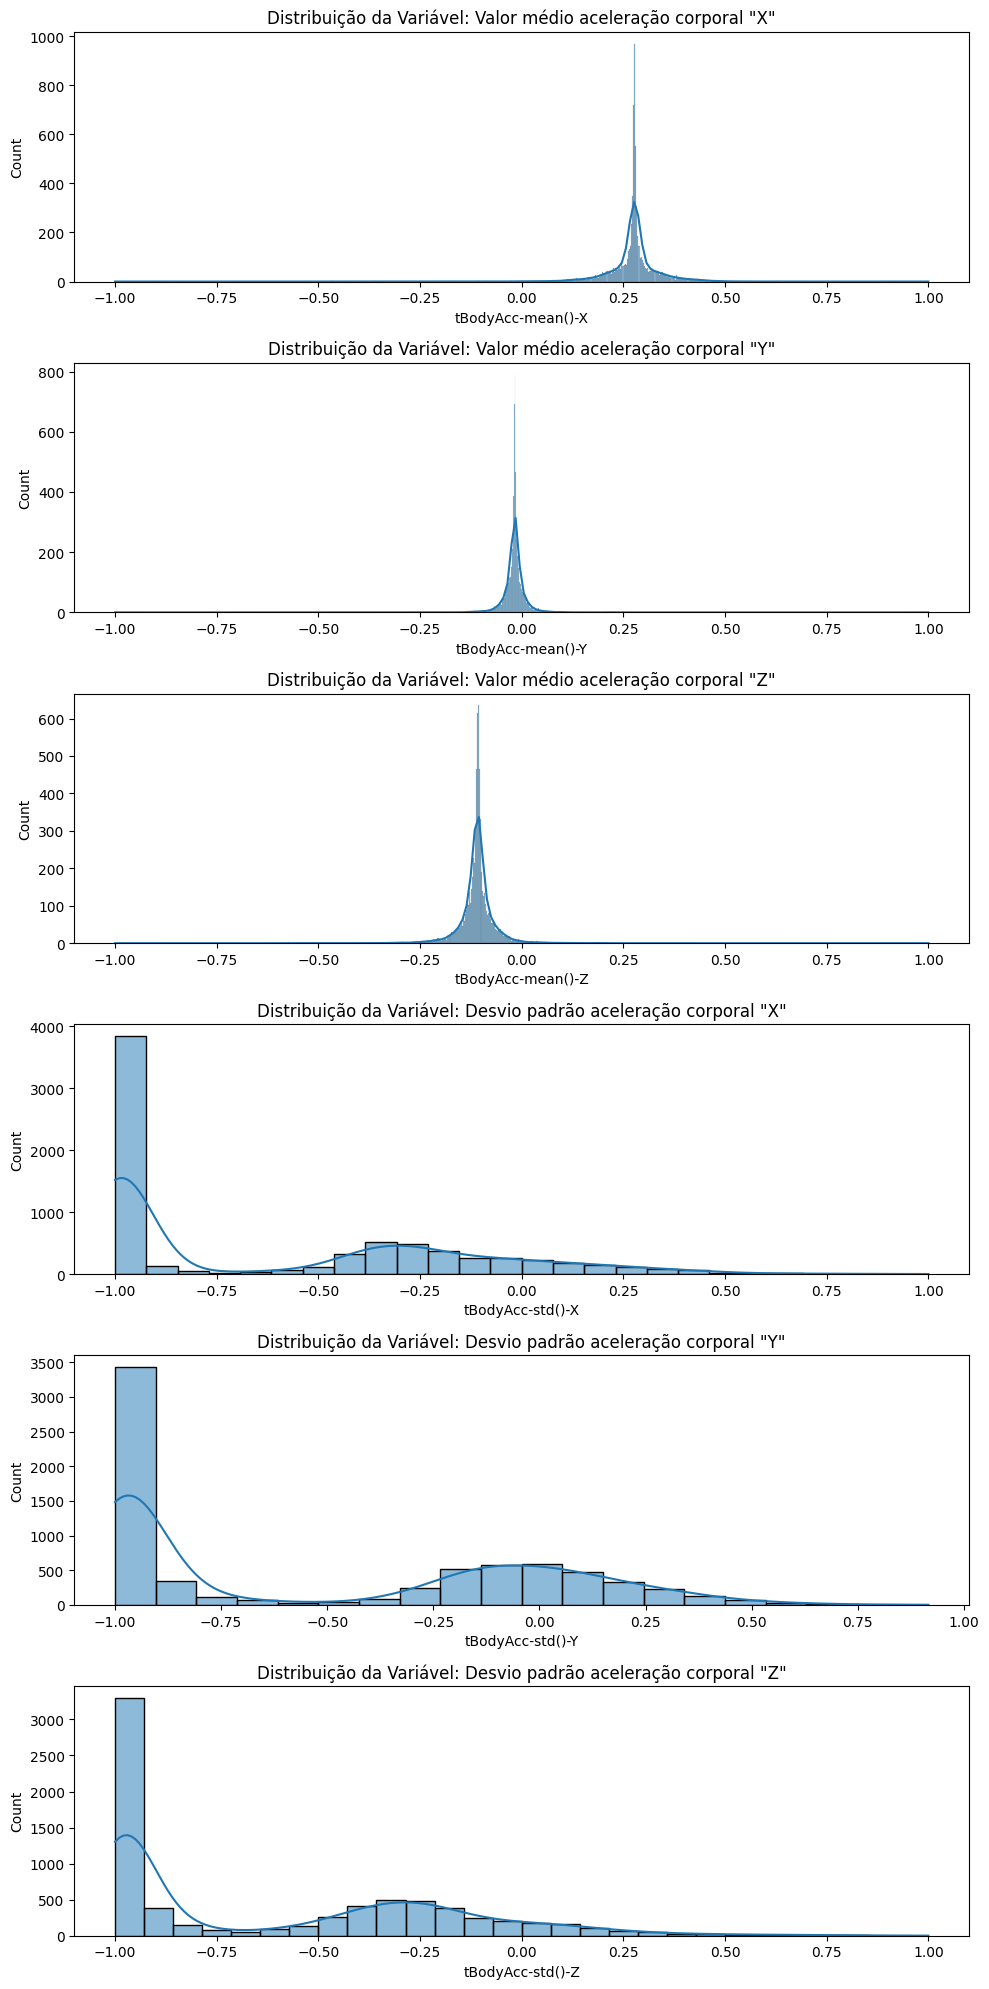

In [18]:
titles = ['Valor médio aceleração corporal "X"',
          'Valor médio aceleração corporal "Y"',
          'Valor médio aceleração corporal "Z"',
          'Desvio padrão aceleração corporal "X"',
          'Desvio padrão aceleração corporal "Y"',
          'Desvio padrão aceleração corporal "Z"']
fig, axes = plt.subplots(6, 1, figsize=(10, 20))
for i in range(6):
    sns.histplot(X_train.iloc[:, i], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição da Variável: {titles[i]}')
plt.tight_layout()
plt.show()

### Matriz de Correlação


Correlação entre variáveis

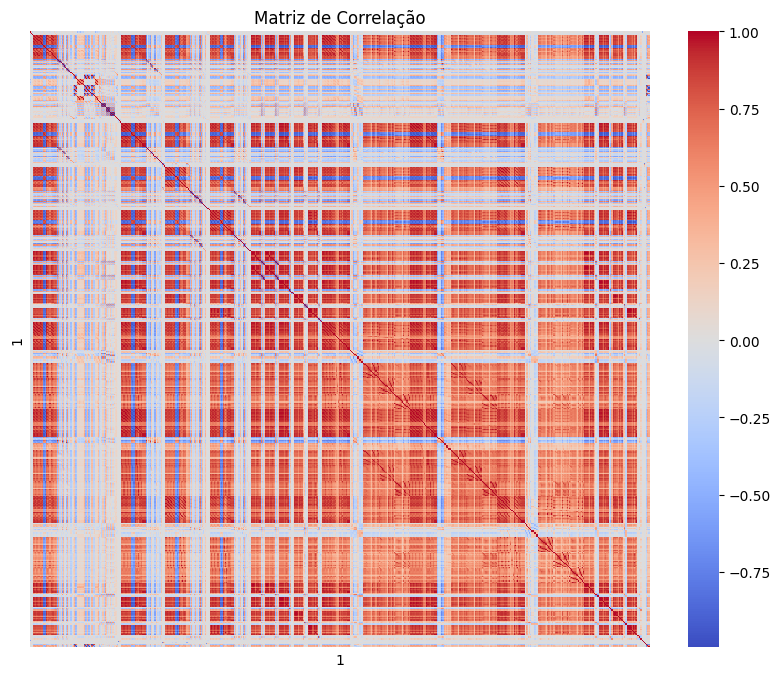

In [7]:
# Matriz de correlação para verificar correlação entre variáveis
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Matriz de Correlação")
plt.show()

## 3. Implementação do K-means

In [8]:
# Testar diferentes valores de K (Elbow Method)
inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

### Gráfico do método do cotovelo

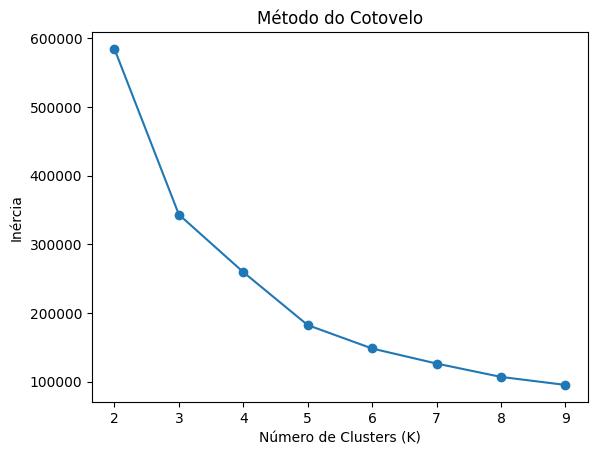

In [9]:
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.show()

### Gráfico do Silhouette Score

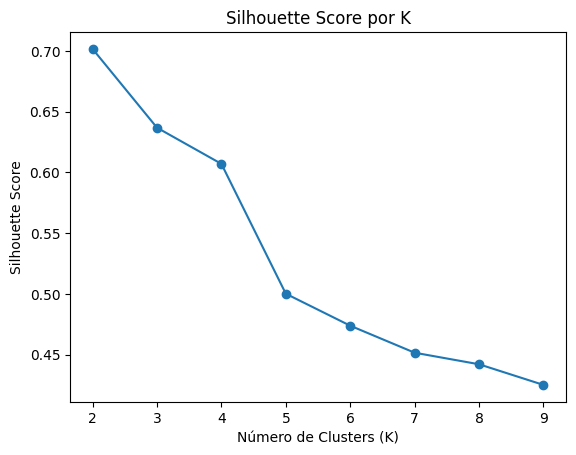

In [17]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Score por K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

## 4. Escolha e Avaliação Final do Modelo

### Repetição do K-means

In [11]:
best_k = 6
repeated_inertia = []
for _ in range(10):  # Executando K-means 10 vezes para verificar estabilidade
    kmeans = KMeans(n_clusters=best_k, init="k-means++", random_state=None, n_init=10)
    kmeans.fit(X_pca)
    repeated_inertia.append(kmeans.inertia_)

### Modelo 1

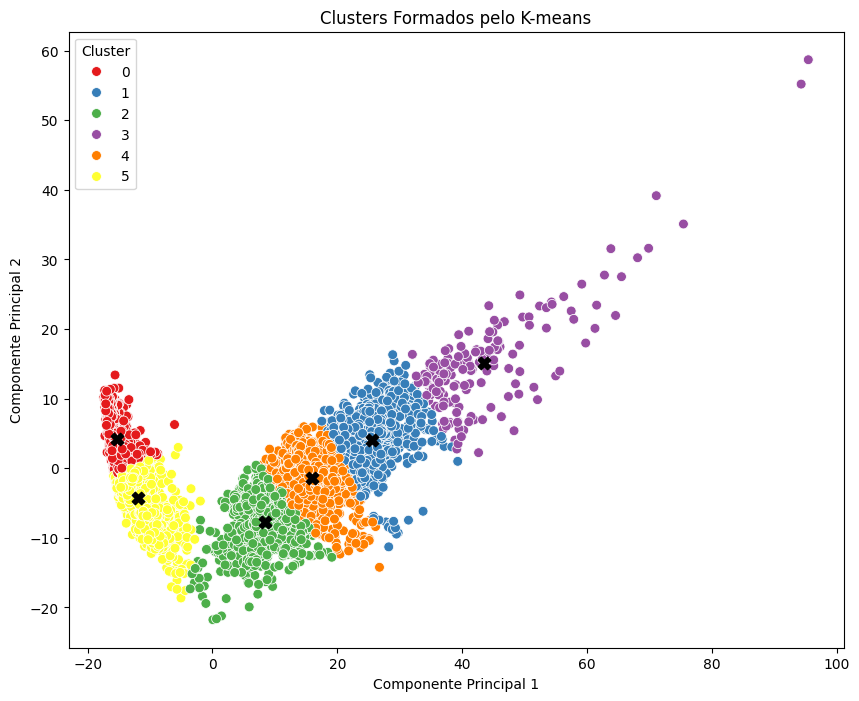

Silhouette Score Final: 0.4738063455115204


In [14]:
final_kmeans = KMeans(n_clusters=best_k, init="k-means++", random_state=42, n_init=10)
final_kmeans.fit(X_pca)

# Visualizando os clusters em 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_kmeans.labels_, palette="Set1", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='black', marker='X')
plt.title("Clusters Formados pelo K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()
silhouette_final = silhouette_score(X_pca, final_kmeans.labels_)
print(f"Silhouette Score Final: {silhouette_final}")

### Modelo 2

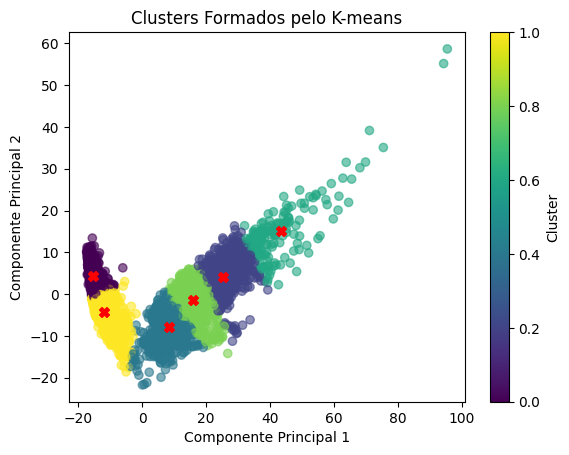

Silhouette Score Final: 0.4738063455115204


In [ ]:
# Seleção de K com base no melhor silhouette score (exemplo, K=6)
k = 6
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
kmeans.fit(X_pca)

# Visualização dos clusters finais
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X')
plt.title("Clusters Formados pelo K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.show()

# Avaliação Final
print(f"Silhouette Score Final: {silhouette_score(X_pca, kmeans.labels_)}")
